In [1]:
import gensim.downloader as api
import pandas as pd
import os.path
import matplotlib.pyplot as plt

In [2]:
def eval_w2v(model_name):
    df = pd.read_csv('synonyms.csv')
    model = api.load(model_name)
    words = list(model.key_to_index)
    guess = ''
    label = 'guess'
    num_correct = 0
    num_missing = 0

    if os.path.exists(F'{model_name}-details.csv'): 
        open(F'{model_name}-details.csv', 'w').close()

    with open(F'{model_name}-details.csv', 'a') as f:
        f.write('question,answer,guess,label')
        for val in df.values:
            options = val[2:6]
            f.write(F'\n{val[0]},{val[1]},')
            cosine_measure = 0
            
            if val[0] in words:

                for o in options:
                    # Make sure the question and option exist in w2v
                    if o in words:
                        sim = model.similarity(val[0],o)
                        if sim > cosine_measure:
                            cosine_measure = sim
                            guess = o

                    else:
                        label = 'guess'
            else: 
                guess = ''
                label = 'guess'

            if guess == val[1]:
                label = 'correct'
                num_correct += 1
            elif guess == '':
                label = 'guess'
                num_missing += 1
            else: 
                label = 'wrong'

            f.write(F'{guess},{label}')
    return len(words), num_correct, (80-num_missing), num_correct/(80-num_missing)

In [3]:
scores = []
if os.path.exists(F'analysis.csv'): 
    open(F'analysis.csv', 'w').close()
    
with open(F'analysis.csv', 'a') as fl:
    fl.write('model,size,C,V,accuracy')
    
    size, C, V, accuracy = eval_w2v('word2vec-google-news-300')
    fl.write(F'\nword2vec-google-news-300,{size},{C},{V},{accuracy}')
    scores.append(accuracy)
    
    size, C, V, accuracy = eval_w2v('glove-wiki-gigaword-200')
    fl.write(F'\nglove-wiki-gigaword-200,{size},{C},{V},{accuracy}')
    scores.append(accuracy)
    
    size, C, V, accuracy = eval_w2v('glove-twitter-200')
    fl.write(F'\nglove-twitter-200,{size},{C},{V},{accuracy}')
    scores.append(accuracy)

    size, C, V, accuracy = eval_w2v('glove-wiki-gigaword-50')
    fl.write(F'\nglove-wiki-gigaword-50,{size},{C},{V},{accuracy}')
    scores.append(accuracy)
    
    size, C, V, accuracy = eval_w2v('glove-wiki-gigaword-100')
    fl.write(F'\nglove-wiki-gigaword-100,{size},{C},{V},{accuracy}')
    scores.append(accuracy)

In [4]:
# Human Gold Standard
scores.append(0.8557)

In [5]:
# Random baseline
scores.append(0.5)

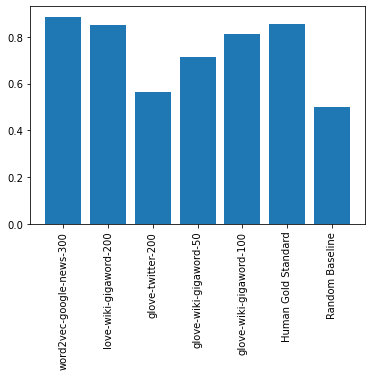

In [20]:
plt.bar(['word2vec-google-news-300','love-wiki-gigaword-200','glove-twitter-200','glove-wiki-gigaword-50','glove-wiki-gigaword-100','Human Gold Standard', 'Random Baseline'],scores)
plt.xticks(rotation=90);